### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Есть столец "studytime, granular", которго нет в описании дата сета.
Вряд ли он понадобится, удалим его.

In [4]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

In [5]:
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [6]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

### Колонка school
аббревиатура школы, в которой учится ученик

In [7]:
display(pd.DataFrame(students.school.value_counts()))
students.loc[:, ['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- 2 вида школы
- пропущенных значений нет

### Колонка sex

пол ученика ('F' - женский, 'M' - мужской)

In [8]:
display(pd.DataFrame(students.sex.value_counts()))
students.loc[:, ['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- мальчиков меньше, чем девочек
- пропущенных значений нет

### Колонка age

возраст ученика (от 15 до 22)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

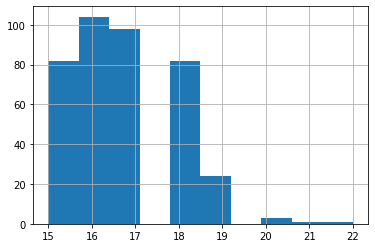

In [9]:
students.age.hist()
students.age.describe()

- большинство учеников в возрасте от 16 до 18 лет

### Колонка address

тип адреса ученика ('U' - городской, 'R' - за городом)

In [10]:
display(pd.DataFrame(students.address.value_counts()))
students.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


часть данных отсутствует (17 записей), тем не менее можно сделать вывод, что большая часть учеников проживает в городе

### Колонка famsize

размер семьи('LE3' <= 3, 'GT3' >3)

In [11]:
display(pd.DataFrame(students.famsize.value_counts()))
students.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


 - 27 незаполненных значений
 - можно сделать вывод, что большинство учеников из семей, где больше трех человек, т.е. вероятно больше одного ребенка

### Колонка pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [12]:
display(pd.DataFrame(students.pstatus.value_counts()))
students.loc[:, ['pstatus']].info()

,pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


 - 45 незаполненных значений
 - можно предположить, что большинство живет в полной семье

### Колонка medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [13]:
display(pd.DataFrame(students.medu.value_counts()))
students.loc[:, ['medu']].info()

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


- 3 незаполненных поля
- у трети учеников матери получили высшее образование

### Колонка fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [14]:
display(pd.DataFrame(students.fedu.value_counts()))
students.loc[:, ['fedu']].info()

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


мы знаем, что оценивали по шкале от 0 до 4, поэтому 40 - явная опечатка

т.к. значений 4 явно больше 0, предполагаю, что хотели ввести 4

заменим 40 на 4

In [15]:
students.fedu = students.fedu.apply(lambda x: 4 if x == 40 else x)
display(pd.DataFrame(students.fedu.value_counts()))
students.loc[:, ['fedu']].info()

,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


- 24 незаполненных значения
- можно сделать вывод, что средний уровень образования отцов ниже, чем у матерей

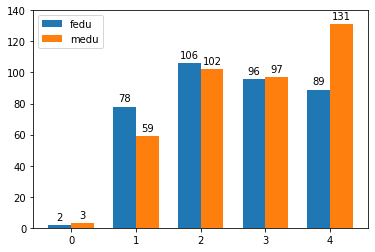

In [45]:
%matplotlib inline

labels = [0, 1, 2, 3, 4]
fedu = [students[(students.fedu == 0)].fedu.count(), students[(students.fedu == 1)].fedu.count(),
        students[(students.fedu == 2)].fedu.count(), students[(students.fedu == 3)].fedu.count(), students[(students.fedu == 4)].fedu.count()]
medu = [students[(students.medu == 0)].medu.count(), students[(students.medu == 1)].medu.count(),
        students[(students.medu == 2)].medu.count(), students[(students.medu == 3)].medu.count(), students[(students.medu == 4)].medu.count()]

x = np.arange(students.fedu.nunique())
width = 0.35

fig, axis = plt.subplots()
fedu = axis.bar(x - width/2, fedu, width, label='fedu')
medu = axis.bar(x + width/2, medu, width, label='medu')
axis.legend()
axis.set_ylim(0, 140)

def autolabel(edu):
    """Добавляем подпись значений каждого столбца"""
    for ed in edu:
        height = ed.get_height()
        axis.annotate('{}'.format(height),
                    xy=(ed.get_x() + ed.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(fedu)
autolabel(medu)

plt.show()

### Колонка mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [16]:
display(pd.DataFrame(students.mjob.value_counts()))
students.loc[:, ['mjob']].info()

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- 21 незаполненное значение
- большинство матерей заняты на какой-либо работе

### Колонка fjob
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [17]:
display(pd.DataFrame(students.fjob.value_counts()))
students.loc[:, ['fjob']].info()

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- 36 незаполненных значений (тенденция, что про отцов больше незаполненных значений ?)
- ожидаемо, среди женщин больше домохозяек, чем среди мужчин

AttributeError: 'numpy.int32' object has no attribute 'get_height'

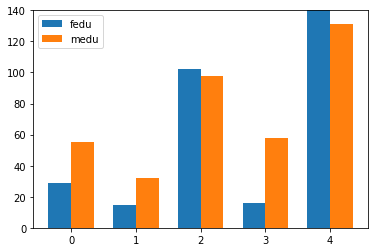

In [47]:
labels = ['teacher', 'health', 'services', 'at_home', 'other']
fjob = [students[(students.fjob == 'teacher')].fjob.count(), students[(students.fjob == 'health')].fjob.count(),
        students[(students.fjob == 'services')].fjob.count(), students[(students.fjob == 'at_home')].fjob.count(), 
        students[(students.fjob == 'other')].fedu.count()]
mjob = [students[(students.mjob == 'teacher')].mjob.count(), students[(students.mjob == 'health')].mjob.count(),
        students[(students.mjob == 'services')].mjob.count(), students[(students.mjob == 'at_home')].mjob.count(), 
        students[(students.mjob == 'other')].medu.count()]

x = np.arange(students.fjob.nunique())
width = 0.35

fig, axis = plt.subplots()
fedu = axis.bar(x - width/2, fjob, width, label='fedu')
medu = axis.bar(x + width/2, mjob, width, label='medu')
axis.legend()
axis.set_ylim(0, 140)

def autolabel(job):
    """Добавляем подпись значений каждого столбца"""
    for j in job:
        height = j.get_height()
        axis.annotate('{}'.format(height),
                    xy=(j.get_x() + j.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(fjob)
autolabel(mjob)

plt.show()

### Колонка reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [18]:
display(pd.DataFrame(students.reason.value_counts()))
students.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- 17 незаполненных значений
- только треть ориентировалась на образовательную программу при выборе школы

### Колонка guardian
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [19]:
display(pd.DataFrame(students.guardian.value_counts()))
students.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- 31 незаполненное значение
- большинство учеников находится под опекой матери

### Колонка traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [20]:
display(pd.DataFrame(students.traveltime.value_counts()))
students.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


- 28 незаполненных значений
- больше половины учеников живет в пешей доступности от школы

### Колонка studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [21]:
display(pd.DataFrame(students.studytime.value_counts()))
students.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


 - 7 незаполненных значений
 - за пределами школы ученики в большинстве своем тратят немного времени

### Колонка failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [22]:
display(pd.DataFrame(students.failures.value_counts()))
students.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


- 22 назполненных поля
- неясно как трактовать этот показатель, с одной стороны 0 может означать отсутствие неудач, что положительный показатель, с другой стороны в 0 могут включаться и больше 3 неудач, что явно отрицательный фактор 

### Колонка schoolsup
дополнительная образовательная поддержка (yes или no)

In [24]:
display(pd.DataFrame(students.schoolsup.value_counts()))
students.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- 9 незаполненных значений
- большинство учеников ограничиваются только занятиями в школе, не имеют дополнительной образовательной поддержки

### Колонка famsup
семейная образовательная поддержка (yes или no)

In [25]:
display(pd.DataFrame(students.famsup.value_counts()))
students.loc[:, ['famsup']].info()

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- 39 незаполненных значений
- 

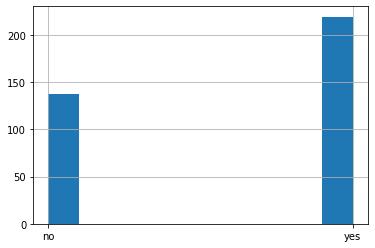

In [26]:
students.famsup.hist()

      'famsup', 'paid', 'activities', 'nursery',
       'studytime', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'